# Swarm Behaviour Classification
Aim of the project to build a machine learning model with highest accuracy, which will classify the behaviour of a swarm.

# DataSet
I have Downloaded this dataset from kaggle website. Here is the link: https://www.kaggle.com/deepcontractor/swarm-behaviour-classification

# What are we required to do
We have to classify the behaviour of a swarm.

# Importing the Required Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve

In [3]:
import pandas as pd
df=pd.read_csv('Swarm_Behaviour.csv')

In [4]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [5]:
df["Swarm_Behaviour"].unique()

array([0., 1.])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [8]:
df.isna().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [9]:
df.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


C:\Users\Souvik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

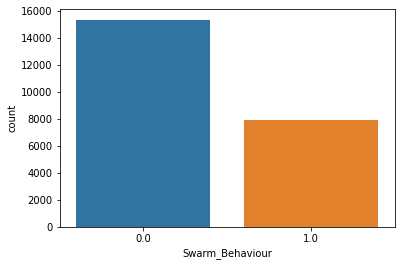

In [10]:
sns.countplot(df["Swarm_Behaviour"])

In [11]:
df["Swarm_Behaviour"].value_counts()/df.shape[0]

0.0    0.658758
1.0    0.341242
Name: Swarm_Behaviour, dtype: float64

# Dimensionality Technique (PCA)

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.drop("Swarm_Behaviour",axis=1)
X=scaler.fit_transform(X)

In [13]:
variance=[]
p=[50,100,150,200,300,400,500,600,700,800,900,1000,1100,1300,1500,1700,1900,2000]
for p in p:
    pca_model=PCA(n_components=p)
    pca_model.fit(X)
    variance.append(np.sum(pca_model.explained_variance_ratio_))
    print("Components:",p)

Components: 50
Components: 100
Components: 150
Components: 200
Components: 300
Components: 400
Components: 500
Components: 600
Components: 700
Components: 800
Components: 900
Components: 1000
Components: 1100
Components: 1300
Components: 1500
Components: 1700
Components: 1900
Components: 2000


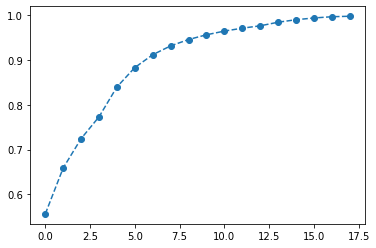

In [14]:
plt.plot(variance,"o--")

In [15]:
pca_model=PCA(n_components=400)
pca_model.fit(X)

PCA(n_components=400)

In [16]:
np.sum(pca_model.explained_variance_ratio_)

0.8832052823292502

In [17]:
features=pca_model.transform(X)

In [18]:
features

array([[-1.07942510e+01, -1.04702726e-01, -1.05961884e+01, ...,
        -1.18610112e-02,  1.44926842e+00,  3.67663982e-01],
       [-7.77354448e-01, -4.39276533e+00, -7.40303112e+00, ...,
         7.87065981e-02, -1.31268567e+00,  4.58292098e-01],
       [-4.02338516e+00, -5.84605964e+00, -1.14187943e+01, ...,
        -3.08328858e-01,  5.06782550e-01, -5.14863986e-01],
       ...,
       [-1.13680607e+01,  5.60452806e-02, -1.07826018e+01, ...,
        -8.22159551e-01, -4.19640622e-01, -7.25831103e-01],
       [-2.49849380e+01, -1.99073363e+01,  1.51573524e+01, ...,
        -7.56251607e-01,  1.15223126e+00, -2.90469015e-01],
       [-2.67435753e+00, -7.05300780e+00, -8.66911857e+00, ...,
        -1.59681594e-01,  2.36168558e-01,  2.10621113e-01]])

In [19]:
X=features
y=df["Swarm_Behaviour"]

# Models Creation
1. Logistic Regression
2. K Nearest Neighbors
3. Ridge Classifier
4. Support Vector Classifier
5. Decision Tree Classifier
6. Bagging Classifier
7. Random Forest Classifier
8. Extra Trees Classifier
9. Ada Boost Classifier
10. Gradient Boost Classifier
11. XGBClassifier
12. LGBMClassifier
13. Cat Boost Classifier
14. Bernoulli NB
15. SGDClassifier
16. Voting Classifier

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

# Logistic Regression Algorithm

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,max_iter=10000)
penalty=["l1","l2","elasticnet"]
l1_ratio=[0.01,0.1,0.5,1]
C= [0.01,0.1,1]

paramgrid={
           "penalty":penalty,
           "l1_ratio":l1_ratio,
           "C":C}


In [23]:
import warnings
warnings.filterwarnings("ignore")
grid_model=GridSearchCV(lr,paramgrid,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l1; total time=   0.0s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   3.2s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   2.7s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   2.2s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   2.6s
[CV] END ..................C=0.01, l1_ratio=0.01, penalty=l2; total time=   2.5s
[CV] END ..........C=0.01, l1_ratio=0.01, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=0.01, l1_ratio=0.01, penal

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=101),
             param_grid={'C': [0.01, 0.1, 1], 'l1_ratio': [0.01, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, verbose=2)

In [24]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056045,0.011925,0.000000,0.000000,0.01,0.01,l1,"{'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.731965,0.356248,0.004396,0.000483,0.01,0.01,l2,"{'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l2'}",0.900486,0.893879,...,0.899605,0.004502,1,0.920695,0.922846,0.919914,0.920915,0.920629,0.921,0.000982
2,0.048867,0.001082,0.000000,0.000000,0.01,0.01,elasticnet,"{'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'elas...",NaN,NaN,...,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.054450,0.005801,0.000000,0.000000,0.01,0.1,l1,"{'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l1'}",NaN,NaN,...,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.436496,0.211247,0.004189,0.000398,0.01,0.1,l2,"{'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2'}",0.900486,0.893879,...,0.899605,0.004502,1,0.920695,0.922846,0.919914,0.920915,0.920629,0.921,0.000982


Text(0, 0.5, 'Score')

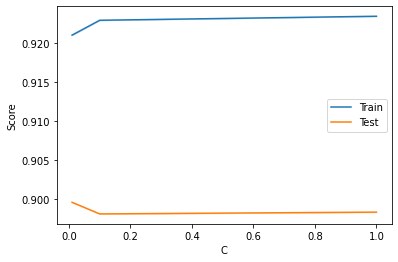

In [25]:
sns.lineplot(data=cv_results,x="param_C",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_C",y="mean_test_score",label="Test")
plt.xlabel("C")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

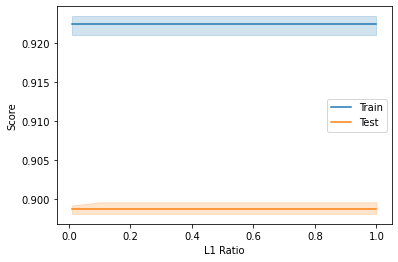

In [26]:
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_test_score",label="Test")
plt.xlabel("L1 Ratio")
plt.ylabel("Score")

In [27]:
grid_model.best_params_

{'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l2'}

In [28]:
lr=LogisticRegression(C=0.01,l1_ratio=0.01,penalty="l2",random_state=101,max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, l1_ratio=0.01, max_iter=10000, random_state=101)

In [29]:
y_pred=lr.predict(X_test)
y_pred2=lr.predict(X_train)

In [30]:
acc_lr=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9171672101138378
Test:  0.8960192175703501


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      3808
         1.0       0.86      0.83      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.88      0.88      5828
weighted avg       0.90      0.90      0.90      5828



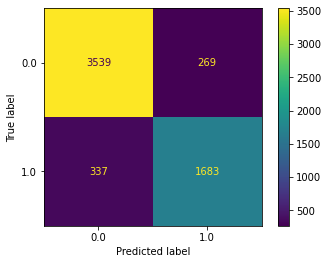

In [32]:
plot_confusion_matrix(lr,X_test,y_test);

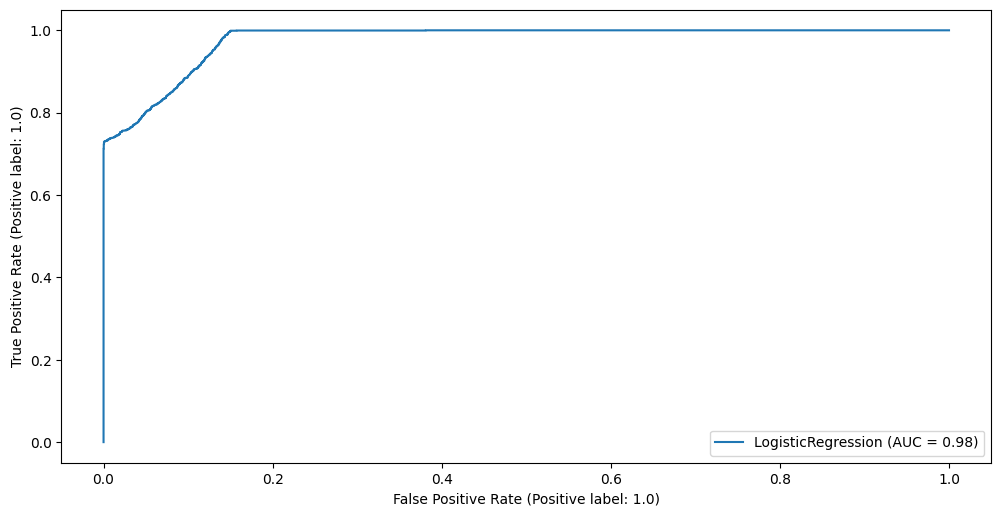

In [33]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(lr,X_test,y_test,ax=ax);

# K Nearest Neighbors Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
acc=[]
for n in range(1,15):
    KNC=KNeighborsClassifier(n_neighbors=n)
    KNC.fit(X_train,y_train)
    y_pred= KNC.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

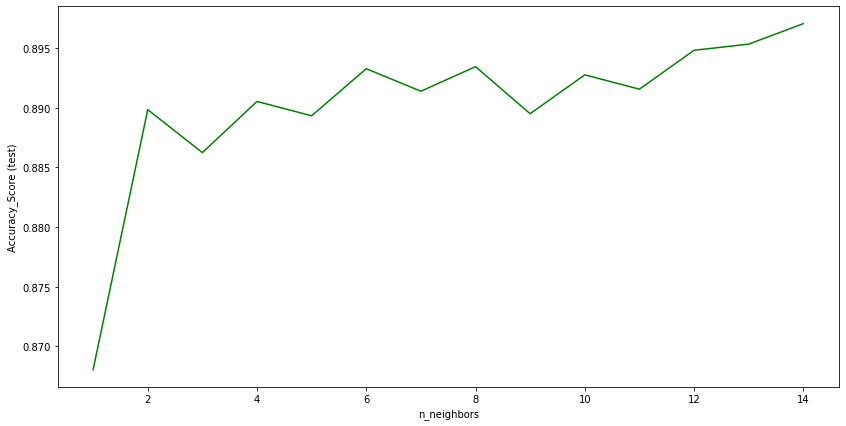

In [36]:
plt.figure(figsize=(14,7))
sns.lineplot(x=np.arange(1,15),y=acc,color="green")
plt.ylabel("Accuracy_Score (test)")
plt.xlabel("n_neighbors");

In [37]:
KNC=KNeighborsClassifier(n_neighbors=6)
KNC.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [38]:
y_pred=KNC.predict(X_test)
y_pred2=KNC.predict(X_train)

In [39]:
acc_KNC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9279789485727361
Test:  0.893273850377488


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      3808
         1.0       0.89      0.79      0.84      2020

    accuracy                           0.89      5828
   macro avg       0.89      0.87      0.88      5828
weighted avg       0.89      0.89      0.89      5828



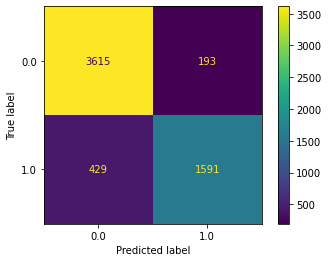

In [41]:
plot_confusion_matrix(KNC,X_test,y_test);

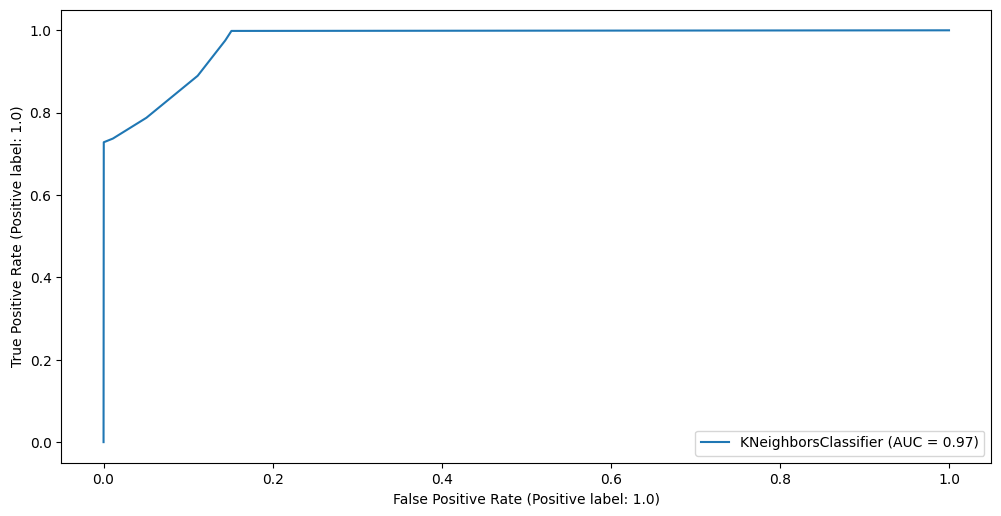

In [42]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(KNC,X_test,y_test,ax=ax);

# Ridge Classifier Algorithm

In [43]:
from sklearn.linear_model import RidgeClassifier

In [44]:
RC=RidgeClassifier(random_state=101)
params={"alpha":[0.0001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,10]}
grid_model=GridSearchCV(RC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......................................alpha=0.0001; total time=   0.6s
[CV] END .......................................alpha=0.0001; total time=   0.2s
[CV] END .......................................alpha=0.0001; total time=   0.2s
[CV] END .......................................alpha=0.0001; total time=   0.2s
[CV] END .......................................alpha=0.0001; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.05; total time=   0.3s
[CV] END .......................................

GridSearchCV(estimator=RidgeClassifier(random_state=101),
             param_grid={'alpha': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   10]},
             return_train_score=True, verbose=2)

In [45]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.388175,0.129279,0.004389,0.000488,0.0001,{'alpha': 0.0001},0.904776,0.898455,0.908753,0.893307,...,0.901207,0.005289,1,0.920767,0.920486,0.917984,0.920343,0.919986,0.919913,0.000997
1,0.389358,0.053001,0.004389,0.000488,0.01,{'alpha': 0.01},0.904776,0.898455,0.908753,0.893307,...,0.901207,0.005289,1,0.920767,0.920486,0.917984,0.920343,0.919986,0.919913,0.000997
2,0.337174,0.016520,0.004594,0.000493,0.05,{'alpha': 0.05},0.904776,0.898455,0.908753,0.893307,...,0.901207,0.005289,1,0.920767,0.920486,0.917984,0.920343,0.919986,0.919913,0.000997
3,0.356963,0.059548,0.004781,0.000395,0.1,{'alpha': 0.1},0.904776,0.898455,0.908753,0.893307,...,0.901207,0.005289,1,0.920767,0.920486,0.917984,0.920343,0.919986,0.919913,0.000997
4,0.345025,0.026216,0.004588,0.000489,0.2,{'alpha': 0.2},0.904776,0.898455,0.908753,0.893307,...,0.901207,0.005289,1,0.920767,0.920486,0.917984,0.920343,0.919986,0.919913,0.000997


Text(0, 0.5, 'Score')

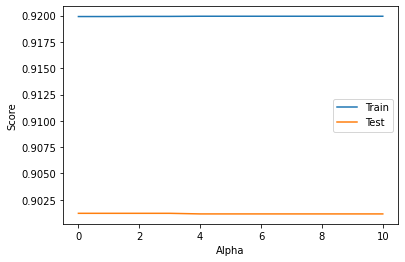

In [46]:
sns.lineplot(data=cv_results,x="param_alpha",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_alpha",y="mean_test_score",label="Test")
plt.xlabel("Alpha")
plt.ylabel("Score")

In [47]:
grid_model.best_params_

{'alpha': 0.0001}

In [48]:
RC=RidgeClassifier(alpha=0.0001,random_state=101)
RC.fit(X_train,y_train)

RidgeClassifier(alpha=0.0001, random_state=101)

In [49]:
y_pred=RC.predict(X_test)
y_pred2=RC.predict(X_train)

In [50]:
acc_RC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9175676448715748
Test:  0.8972203157172272


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      3808
         1.0       0.86      0.84      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.88      0.89      5828
weighted avg       0.90      0.90      0.90      5828



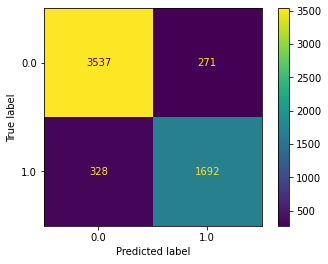

In [52]:
plot_confusion_matrix(RC,X_test,y_test);

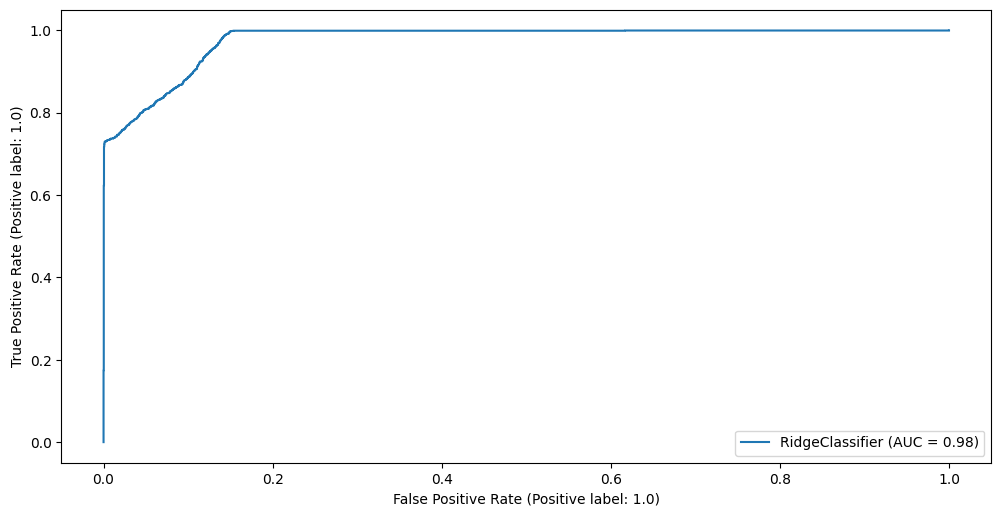

In [54]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(RC,X_test,y_test,ax=ax);

# Support Vector Classifier Algorithm

In [55]:
from sklearn.svm import SVC

In [56]:
params={"C":[0.01,0.1],
    "kernel":["linear"],
    "degree":[1,2,3],
    "gamma":["scale","auto"],}
svc=SVC(random_state=101)

In [57]:
grid_model=GridSearchCV(svc,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  17.7s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  16.5s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  16.8s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  17.0s
[CV] END .......C=0.01, degree=1, gamma=scale, kernel=linear; total time=  16.6s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.9s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.6s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.7s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.8s
[CV] END ........C=0.01, degree=1, gamma=auto, kernel=linear; total time=  16.5s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=  16.9s
[CV] END .......C=0.01, degree=2, gamma=scale, k

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             return_train_score=True, verbose=2)

In [58]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.811650,0.408016,2.196732,0.027871,0.01,1,scale,linear,"{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'ke...",0.9002,...,0.896058,0.006764,1,0.924628,0.927065,0.924205,0.924777,0.925849,0.925305,0.001034
1,14.579824,0.143883,2.232226,0.034479,0.01,1,auto,linear,"{'C': 0.01, 'degree': 1, 'gamma': 'auto', 'ker...",0.9002,...,0.896058,0.006764,1,0.924628,0.927065,0.924205,0.924777,0.925849,0.925305,0.001034
2,14.652424,0.209580,2.278709,0.082401,0.01,2,scale,linear,"{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'ke...",0.9002,...,0.896058,0.006764,1,0.924628,0.927065,0.924205,0.924777,0.925849,0.925305,0.001034
3,14.467126,0.150872,2.192196,0.033806,0.01,2,auto,linear,"{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'ker...",0.9002,...,0.896058,0.006764,1,0.924628,0.927065,0.924205,0.924777,0.925849,0.925305,0.001034
4,14.592972,0.253169,2.212887,0.032603,0.01,3,scale,linear,"{'C': 0.01, 'degree': 3, 'gamma': 'scale', 'ke...",0.9002,...,0.896058,0.006764,1,0.924628,0.927065,0.924205,0.924777,0.925849,0.925305,0.001034


Text(0, 0.5, 'Score')

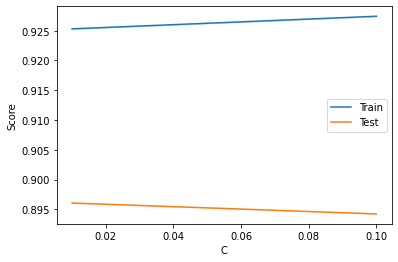

In [59]:
sns.lineplot(data=cv_results,x="param_C",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_C",y="mean_test_score",label="Test")
plt.xlabel("C")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

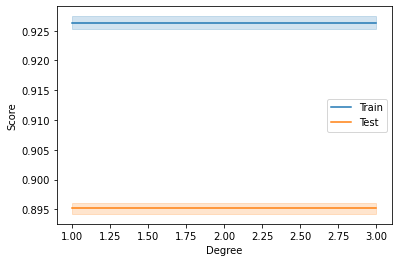

In [60]:
sns.lineplot(data=cv_results,x="param_degree",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_degree",y="mean_test_score",label="Test")
plt.xlabel("Degree")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

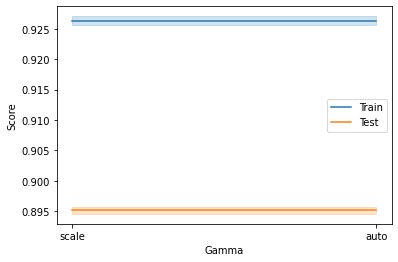

In [61]:
sns.lineplot(data=cv_results,x="param_gamma",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_gamma",y="mean_test_score",label="Test")
plt.xlabel("Gamma")
plt.ylabel("Score")

In [62]:
grid_model.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [63]:
svc=SVC(random_state=101,C=0.01,degree=1,gamma="scale",kernel="linear")
svc.fit(X_train,y_train)

SVC(C=0.01, degree=1, kernel='linear', random_state=101)

In [64]:
y_pred=svc.predict(X_test)
y_pred2=svc.predict(X_train)

In [65]:
acc_SVC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9219724272066815
Test:  0.8934454358270418


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      3808
         1.0       0.86      0.83      0.84      2020

    accuracy                           0.89      5828
   macro avg       0.88      0.88      0.88      5828
weighted avg       0.89      0.89      0.89      5828



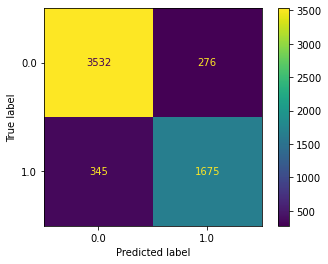

In [67]:
plot_confusion_matrix(svc,X_test,y_test);


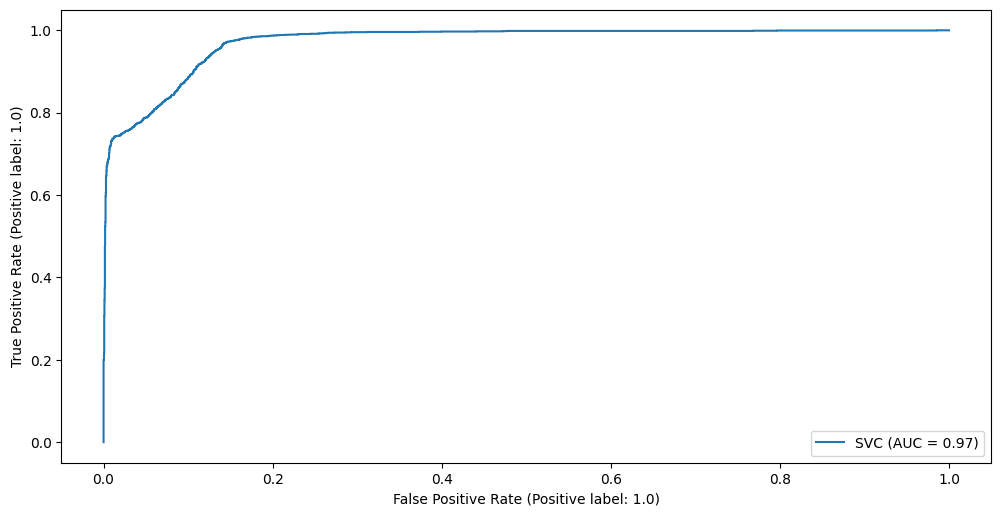

In [68]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(svc,X_test,y_test,ax=ax);

# Decision Tree Classifier Algorithm

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
DTC=DecisionTreeClassifier(random_state=101)
params={"max_depth":[2,4],
    "max_leaf_nodes":[3,6,9],
        "min_samples_leaf":range(5,200,50),
       "min_samples_split":range(5,200,50)}

In [71]:
grid_model=GridSearchCV(DTC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   2.3s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   2.5s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   2.2s
[CV] END max_depth=2, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=55; total time=   2.3s
[CV] END max_depth=2, max_leaf_nod

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [2, 4], 'max_leaf_nodes': [3, 6, 9],
                         'min_samples_leaf': range(5, 200, 50),
                         'min_samples_split': range(5, 200, 50)},
             return_train_score=True, verbose=2)

In [72]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.372057,0.103709,0.009774,0.000399,2,3,5,5,"{'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...",0.893337,...,0.894342,0.001368,33,0.896668,0.900036,0.895531,0.895817,0.896317,0.896874,0.001629
1,2.307031,0.025687,0.009974,0.000020,2,3,5,55,"{'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...",0.893337,...,0.894342,0.001368,33,0.896668,0.900036,0.895531,0.895817,0.896317,0.896874,0.001629
2,2.293674,0.024054,0.011968,0.003024,2,3,5,105,"{'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...",0.893337,...,0.894342,0.001368,33,0.896668,0.900036,0.895531,0.895817,0.896317,0.896874,0.001629
3,2.287278,0.005941,0.011765,0.001830,2,3,5,155,"{'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...",0.893337,...,0.894342,0.001368,33,0.896668,0.900036,0.895531,0.895817,0.896317,0.896874,0.001629
4,2.289658,0.027571,0.009387,0.000492,2,3,55,5,"{'max_depth': 2, 'max_leaf_nodes': 3, 'min_sam...",0.893337,...,0.894342,0.001368,33,0.896668,0.900036,0.895531,0.895817,0.896317,0.896874,0.001629


Text(0, 0.5, 'Score')

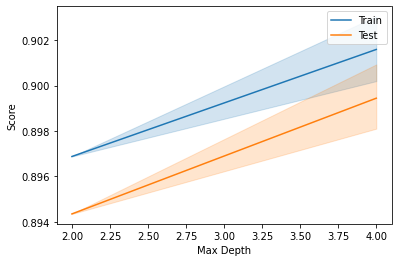

In [73]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

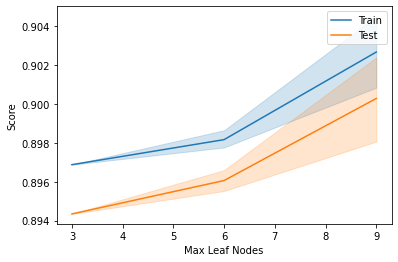

In [74]:
sns.lineplot(data=cv_results,x="param_max_leaf_nodes",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_leaf_nodes",y="mean_test_score",label="Test")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

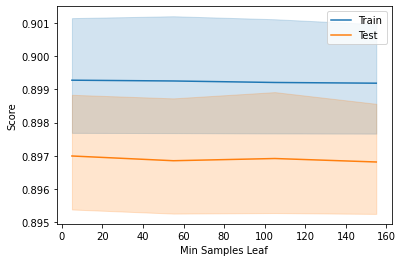

In [75]:
sns.lineplot(data=cv_results,x="param_min_samples_leaf",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_min_samples_leaf",y="mean_test_score",label="Test")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

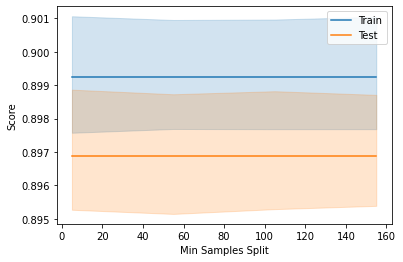

In [76]:
sns.lineplot(data=cv_results,x="param_min_samples_split",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_min_samples_split",y="mean_test_score",label="Test")
plt.xlabel("Min Samples Split")
plt.ylabel("Score")

In [77]:
grid_model.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [78]:
DTC=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=9,min_samples_leaf=5,min_samples_split=5,random_state=101)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=9, min_samples_leaf=5,
                       min_samples_split=5, random_state=101)

In [79]:
y_pred=DTC.predict(X_test)
y_pred2=DTC.predict(X_train)

In [80]:
acc_DTC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9089296950975345
Test:  0.9042553191489362


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      3808
         1.0       0.99      0.73      0.84      2020

    accuracy                           0.90      5828
   macro avg       0.93      0.86      0.89      5828
weighted avg       0.91      0.90      0.90      5828



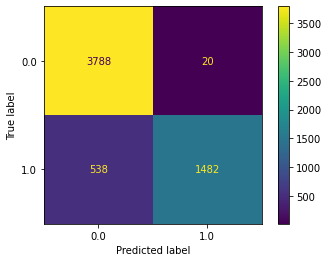

In [82]:
plot_confusion_matrix(DTC,X_test,y_test);

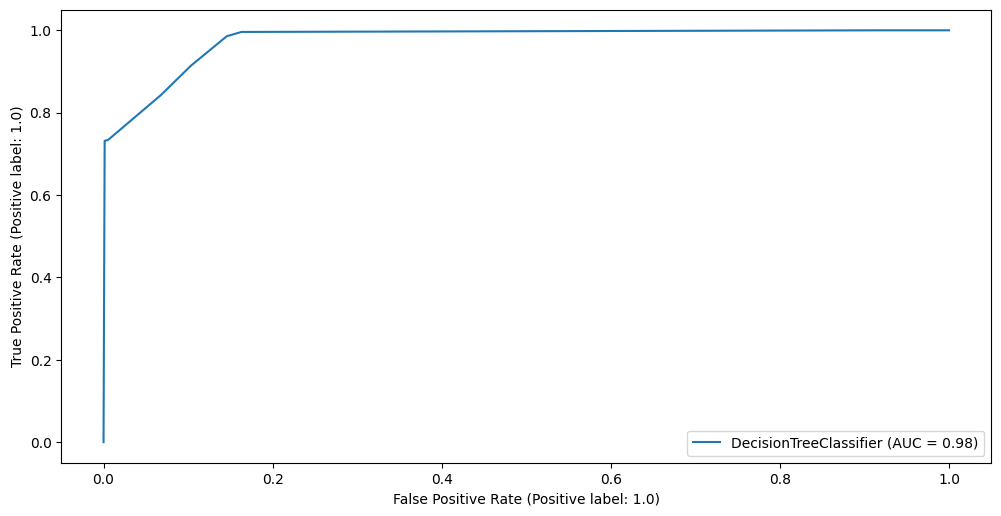

In [83]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(DTC,X_test,y_test,ax=ax);

# Bagging Classifier Algorithm

In [84]:
from sklearn.ensemble import BaggingClassifier

In [85]:
dt=DecisionTreeClassifier(random_state=101)
BC=BaggingClassifier(dt,random_state=101)
params={"max_samples":[1,5,10,20,50,100],
       "max_features":[1,5,10,15,20],
       "base_estimator__max_depth":[1,5,10,15,20]}

In [86]:
grid_model=GridSearchCV(BC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.1s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=1; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max_samples=5; total time=   0.0s
[CV] END base_estimator__max_depth=1, max_features=1, max

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=101),
                                         random_state=101),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [1, 5, 10, 20, 50, 100]},
             return_train_score=True, verbose=2)

In [87]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_max_features,param_max_samples,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.107707,0.021083,0.006177,0.000402,1,1,1,"{'base_estimator__max_depth': 1, 'max_features...",0.660566,0.660469,...,0.660546,0.000111,49,0.660541,0.660565,0.660565,0.660565,0.660493,0.660546,0.000028
1,0.109906,0.013753,0.008178,0.001717,1,1,5,"{'base_estimator__max_depth': 1, 'max_features...",0.485273,0.587815,...,0.601803,0.063367,150,0.491061,0.585341,0.624383,0.653629,0.654344,0.601752,0.060813
2,0.102730,0.010574,0.006981,0.001261,1,1,10,"{'base_estimator__max_depth': 1, 'max_features...",0.649700,0.629291,...,0.649677,0.011294,102,0.639159,0.632106,0.649339,0.654201,0.661995,0.647360,0.010629
3,0.105513,0.012179,0.007778,0.000977,1,1,20,"{'base_estimator__max_depth': 1, 'max_features...",0.658279,0.651888,...,0.653109,0.005270,82,0.655392,0.651913,0.647622,0.644405,0.658134,0.651493,0.004994
4,0.100337,0.009016,0.006988,0.000640,1,1,50,"{'base_estimator__max_depth': 1, 'max_features...",0.660852,0.660469,...,0.660031,0.002729,75,0.660112,0.659850,0.660207,0.657490,0.661566,0.659845,0.001320


Text(0, 0.5, 'Score')

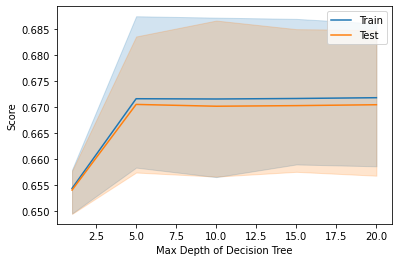

In [88]:
sns.lineplot(data=cv_results,x="param_base_estimator__max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_base_estimator__max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

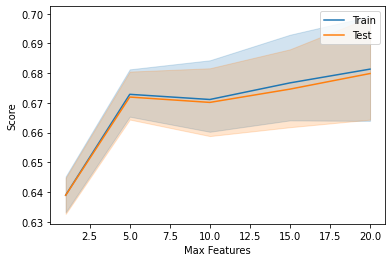

In [89]:
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

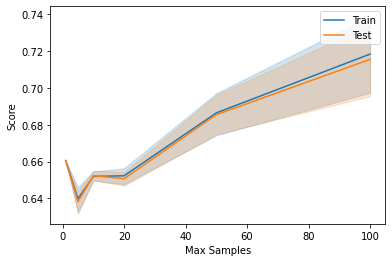

In [90]:
sns.lineplot(data=cv_results,x="param_max_samples",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_samples",y="mean_test_score",label="Test")
plt.xlabel("Max Samples")
plt.ylabel("Score")

In [91]:
grid_model.best_params_

{'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 100}

In [92]:
dt=DecisionTreeClassifier(max_depth=5,random_state=101)
BC=BaggingClassifier(dt,random_state=101,max_features=20,max_samples=100)
BC.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=101),
                  max_features=20, max_samples=100, random_state=101)

In [93]:
y_pred=BC.predict(X_test)
y_pred2=BC.predict(X_train)

In [94]:
acc_BC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.789256907499571
Test:  0.7850034317089911


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      3808
         1.0       0.78      0.53      0.63      2020

    accuracy                           0.79      5828
   macro avg       0.78      0.72      0.74      5828
weighted avg       0.78      0.79      0.77      5828



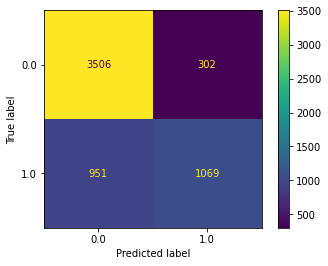

In [96]:
plot_confusion_matrix(BC,X_test,y_test);

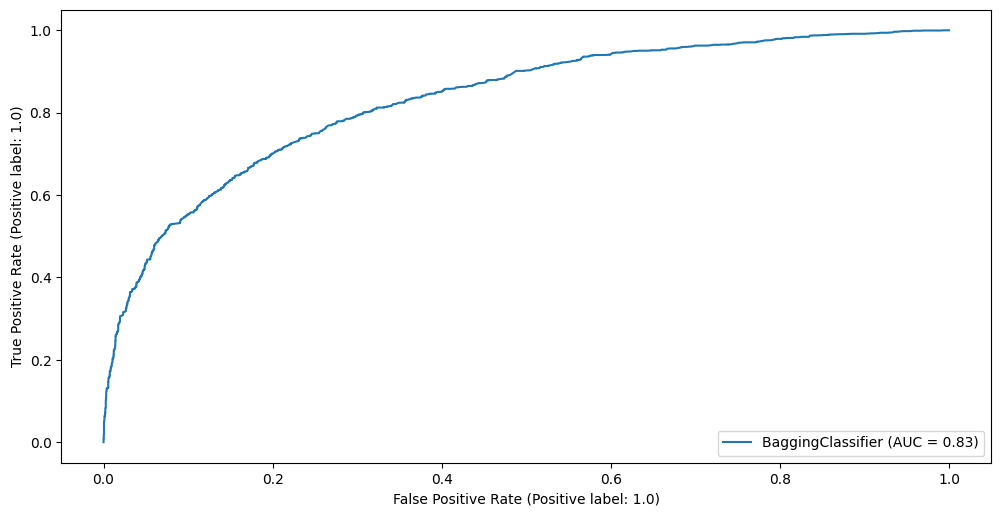

In [97]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(BC,X_test,y_test,ax=ax);

# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
RFC=RandomForestClassifier(random_state=101)
params={
    "n_estimators":[30,64,100,128,200],
    "max_features":[2,3,4],
    "max_depth":[4,8,10,15]}

In [100]:
grid_model=GridSearchCV(RFC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.8s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.7s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.6s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.8s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   1.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   1.5s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   1.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   1.2s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   1.2s
[CV] END ......max_depth=4, max_features=2, n_estimators=100; total time=   2.2s
[CV] END ......max_depth=4, max_features=2, n_e

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [4, 8, 10, 15], 'max_features': [2, 3, 4],
                         'n_estimators': [30, 64, 100, 128, 200]},
             return_train_score=True, verbose=2)

In [101]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.771530,0.071075,0.036502,0.006574,4,2,30,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.696883,0.704805,...,0.699159,0.010980,56,0.699657,0.707258,0.689954,0.720915,0.693743,0.702305,0.010989
1,1.352585,0.076152,0.062842,0.012500,4,2,64,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.672576,0.682494,...,0.677765,0.006732,57,0.678347,0.684305,0.672220,0.690311,0.674008,0.679838,0.006691
2,2.043322,0.067955,0.085579,0.005940,4,2,100,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.669431,0.673627,...,0.671014,0.002299,58,0.674628,0.676225,0.667787,0.672363,0.674079,0.673016,0.002891
3,2.739665,0.074767,0.121875,0.013799,4,2,128,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.666285,0.669050,...,0.666667,0.002064,60,0.667406,0.674365,0.665070,0.668430,0.668502,0.668755,0.003068
4,3.882617,0.181268,0.160571,0.024821,4,2,200,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.665999,0.673913,...,0.668555,0.003453,59,0.669694,0.678298,0.665713,0.672077,0.670647,0.671286,0.004094


Text(0, 0.5, 'Score')

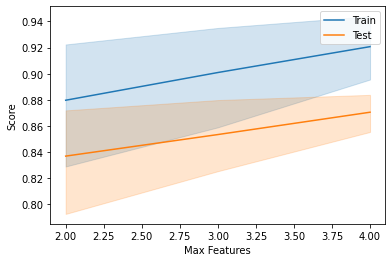

In [102]:
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

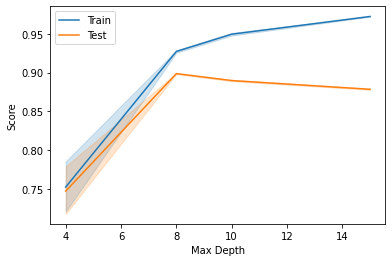

In [103]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

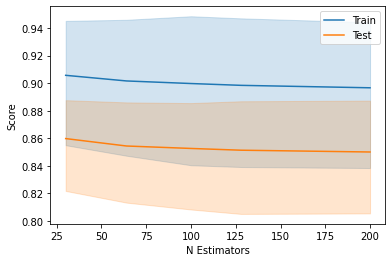

In [104]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

In [105]:
grid_model.best_params_

{'max_depth': 8, 'max_features': 2, 'n_estimators': 128}

In [106]:
RFC=RandomForestClassifier(random_state=101,max_depth=8,max_features=2,n_estimators=200)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=200,
                       random_state=101)

In [107]:
y_pred=RFC.predict(X_test)
y_pred2=RFC.predict(X_train)

In [108]:
acc_RFC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9192837938333047
Test:  0.8985929993136582


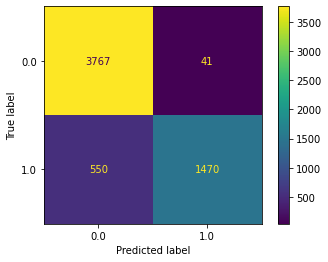

In [109]:
plot_confusion_matrix(RFC,X_test,y_test);

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      3808
         1.0       0.97      0.73      0.83      2020

    accuracy                           0.90      5828
   macro avg       0.92      0.86      0.88      5828
weighted avg       0.91      0.90      0.89      5828



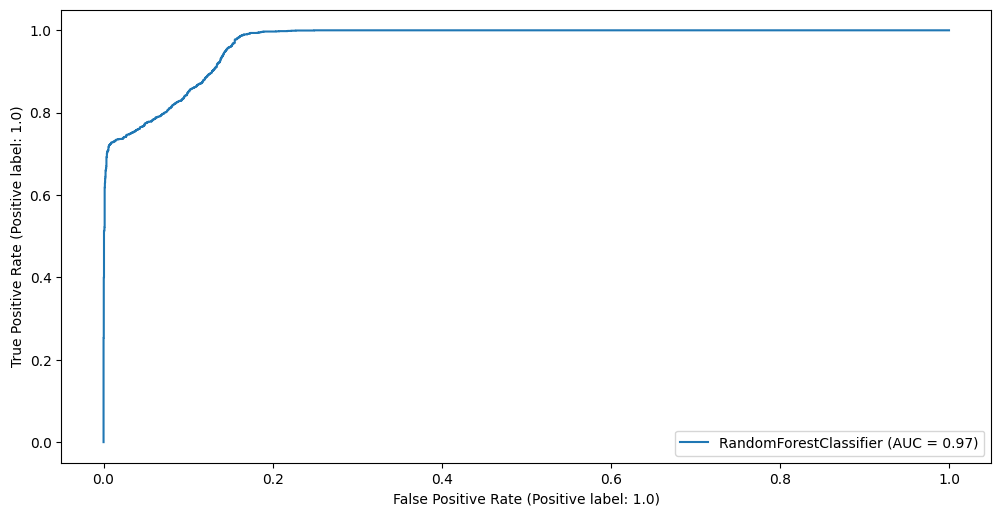

In [111]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(RFC,X_test,y_test,ax=ax);

# Extra Trees Classifier

In [112]:
from sklearn.ensemble import ExtraTreesClassifier

In [113]:
ETC=ExtraTreesClassifier(random_state=101)

In [114]:
params={
    "n_estimators":[30,64,100,128,200],
    "max_features":[2,3,4],
    "max_depth":[4,8,10,15]}

In [115]:
grid_model=GridSearchCV(ETC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=30; total time=   0.3s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.5s
[CV] END .......max_depth=4, max_features=2, n_estimators=64; total time=   0.5s
[CV] END ......max_depth=4, max_features=2, n_estimators=100; total time=   0.7s
[CV] END ......max_depth=4, max_features=2, n_e

GridSearchCV(estimator=ExtraTreesClassifier(random_state=101),
             param_grid={'max_depth': [4, 8, 10, 15], 'max_features': [2, 3, 4],
                         'n_estimators': [30, 64, 100, 128, 200]},
             return_train_score=True, verbose=2)

In [116]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.332509,0.011650,0.028730,0.002032,4,2,30,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.660566,0.660469,...,0.660546,0.000111,15,0.660541,0.660565,0.660565,0.660565,0.660708,0.660589,0.000060
1,0.537805,0.029366,0.048071,0.002916,4,2,64,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.660566,0.660469,...,0.660546,0.000111,15,0.660541,0.660565,0.660565,0.660565,0.660493,0.660546,0.000028
2,0.751788,0.010729,0.072008,0.002716,4,2,100,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.660566,0.660469,...,0.660546,0.000111,15,0.660541,0.660565,0.660565,0.660565,0.660493,0.660546,0.000028
3,0.970997,0.055303,0.092770,0.006050,4,2,128,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.660566,0.660469,...,0.660546,0.000111,15,0.660541,0.660565,0.660565,0.660565,0.660493,0.660546,0.000028
4,1.414423,0.050504,0.153384,0.014548,4,2,200,"{'max_depth': 4, 'max_features': 2, 'n_estimat...",0.660566,0.660469,...,0.660546,0.000111,15,0.660541,0.660565,0.660565,0.660565,0.660493,0.660546,0.000028


Text(0, 0.5, 'Score')

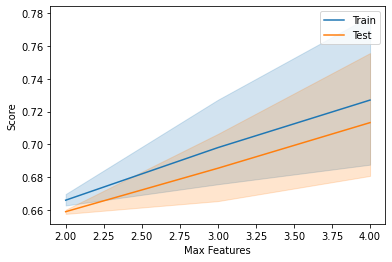

In [117]:
sns.lineplot(data=cv_results,x="param_max_features",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_features",y="mean_test_score",label="Test")
plt.xlabel("Max Features")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

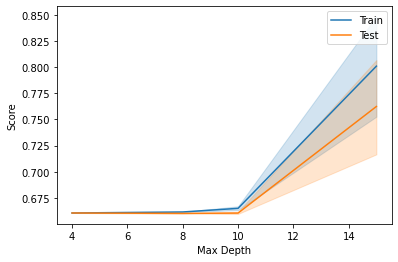

In [118]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

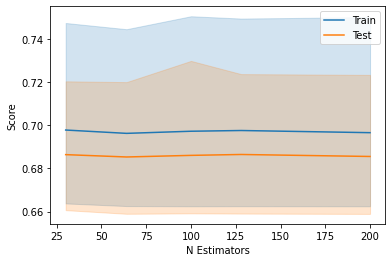

In [119]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

In [120]:
grid_model.best_params_

{'max_depth': 15, 'max_features': 4, 'n_estimators': 200}

In [121]:
ETC=ExtraTreesClassifier(random_state=101,max_depth=15,max_features=4,n_estimators=128)
ETC.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=15, max_features=4, n_estimators=128,
                     random_state=101)

In [122]:
y_pred=ETC.predict(X_test)
y_pred2=ETC.predict(X_train)

In [123]:
acc_ETC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9029231737314799
Test:  0.8601578586135896


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      3808
         1.0       0.93      0.64      0.76      2020

    accuracy                           0.86      5828
   macro avg       0.89      0.81      0.83      5828
weighted avg       0.87      0.86      0.85      5828



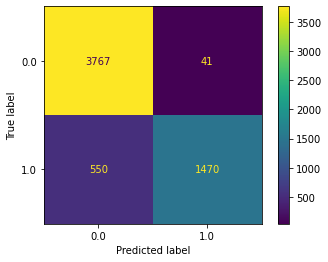

In [125]:
plot_confusion_matrix(RFC,X_test,y_test);

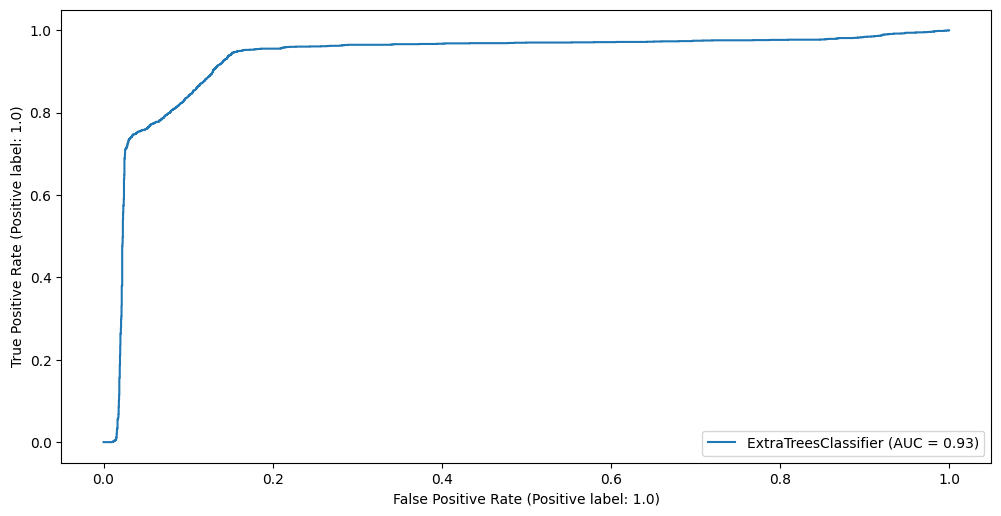

In [126]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(ETC,X_test,y_test,ax=ax);

# Ada Boost Classifier

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
ABC=AdaBoostClassifier(random_state=101)

ABC.fit(X_train,y_train)

AdaBoostClassifier(random_state=101)

In [129]:
acc_ABC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9029231737314799
Test:  0.8601578586135896


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      3808
         1.0       0.93      0.64      0.76      2020

    accuracy                           0.86      5828
   macro avg       0.89      0.81      0.83      5828
weighted avg       0.87      0.86      0.85      5828



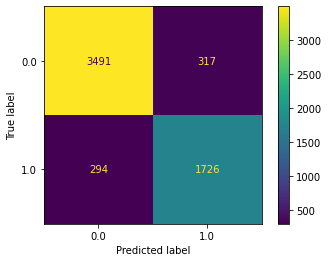

In [131]:
plot_confusion_matrix(ABC,X_test,y_test);

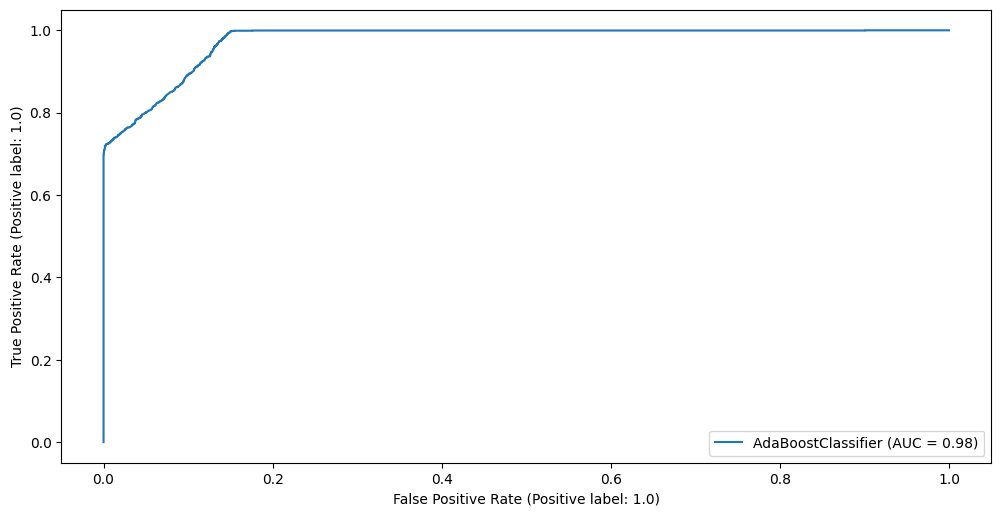

In [132]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(ABC,X_test,y_test,ax=ax);

# Gradient Boost Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
GBC=GradientBoostingClassifier(random_state=101)

params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [135]:
grid_model=GridSearchCV(GBC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.2s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   8.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   8.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   8.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   8.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   8.6s
[CV] END learning_rate=0.2, 

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.2, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.3, 0.6]},
             return_train_score=True, verbose=2)

In [136]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.190608,0.056229,0.014161,0.001938,0.2,3,5,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.910781,...,0.905497,0.004704,4,0.909611,0.909474,0.909260,0.909474,0.912478,0.910059,0.001214
1,8.648476,0.037319,0.014570,0.002406,0.2,3,5,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.905633,...,0.904639,0.003959,8,0.909039,0.908545,0.909117,0.910404,0.910547,0.909530,0.000798
2,8.216645,0.054934,0.013753,0.000754,0.2,3,10,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.903060,...,0.902637,0.003511,14,0.912185,0.913693,0.909331,0.912692,0.917197,0.913020,0.002542
3,17.639612,0.718989,0.013970,0.001092,0.2,3,10,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.900200,...,0.901321,0.003815,16,0.915546,0.913908,0.913693,0.914551,0.913121,0.914164,0.000829
4,12.425978,0.209059,0.014567,0.000795,0.2,3,15,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.902774,...,0.901665,0.002329,15,0.914760,0.915409,0.915409,0.914337,0.917626,0.915508,0.001135


Text(0, 0.5, 'Score')

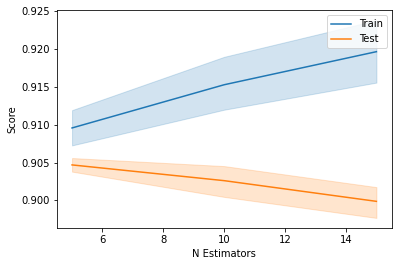

In [137]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

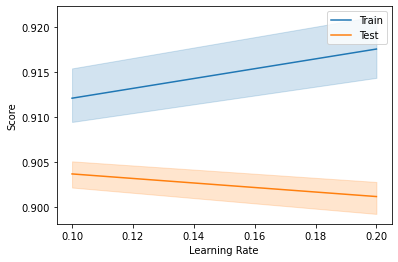

In [138]:
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

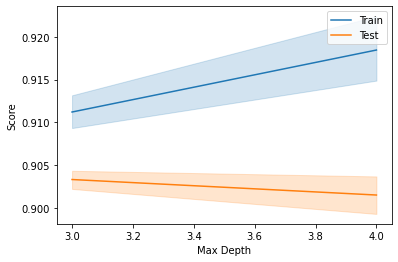

In [139]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

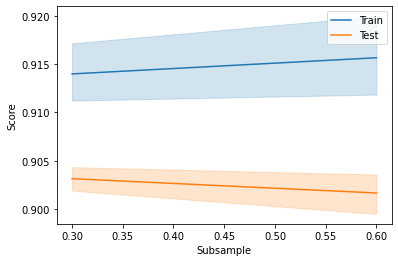

In [140]:
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [141]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5, 'subsample': 0.6}

In [142]:
GBC=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=5,subsample=0.3,random_state=101)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=5, random_state=101,
                           subsample=0.3)

In [143]:
y_pred=GBC.predict(X_test)
y_pred2=GBC.predict(X_train)

In [144]:
acc_GBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9073279560665866
Test:  0.9047700754975978


In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      3808
         1.0       0.99      0.73      0.84      2020

    accuracy                           0.90      5828
   macro avg       0.93      0.86      0.89      5828
weighted avg       0.92      0.90      0.90      5828



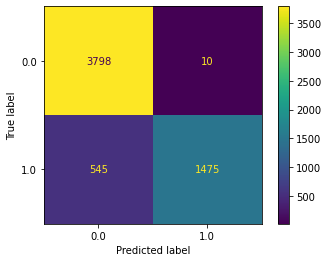

In [146]:
plot_confusion_matrix(GBC,X_test,y_test);

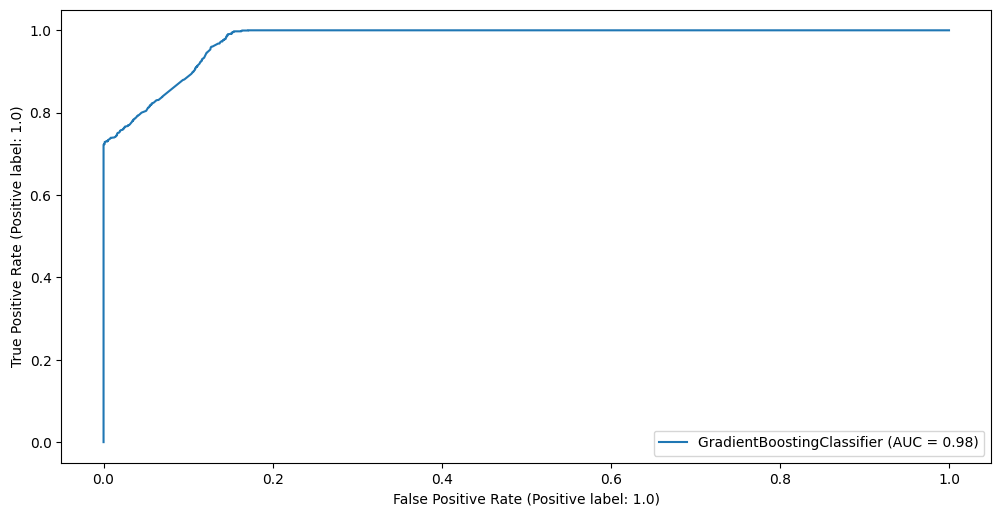

In [147]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(GBC,X_test,y_test,ax=ax);

# XGBClassifier

In [148]:
from xgboost import XGBClassifier

In [149]:
XGBC=XGBClassifier(random_state=101)
params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [150]:
grid_model=GridSearchCV(XGBC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   2.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=101, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.3, 0.6]},
             return_train_score=True, verbose=2)

In [151]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.803152,0.171794,0.050266,0.009703,0.2,3,5,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.902202,...,0.897889,0.004317,17,0.907251,0.909117,0.904612,0.910189,0.906257,0.907485,0.001990
1,2.372058,0.015512,0.042684,0.002779,0.2,3,5,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.897341,...,0.897889,0.003729,16,0.906465,0.912335,0.910118,0.911834,0.909760,0.910102,0.002066
2,2.748650,0.070195,0.041890,0.001095,0.2,3,10,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.904490,...,0.901550,0.003288,4,0.909110,0.911906,0.909403,0.912263,0.915052,0.911547,0.002166
3,3.985542,0.046904,0.044879,0.008510,0.2,3,10,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.902202,...,0.900520,0.002487,6,0.912328,0.913908,0.912192,0.912764,0.913622,0.912963,0.000688
4,3.679960,0.007007,0.042089,0.003907,0.2,3,15,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.902202,...,0.899262,0.003606,11,0.911470,0.914480,0.912120,0.914265,0.914766,0.913420,0.001352


Text(0, 0.5, 'Score')

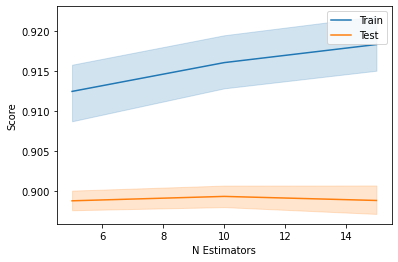

In [152]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

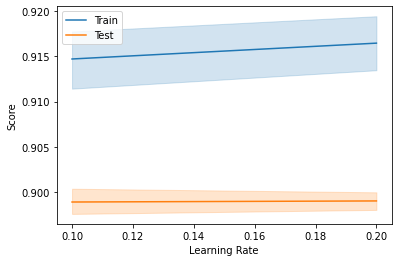

In [153]:
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

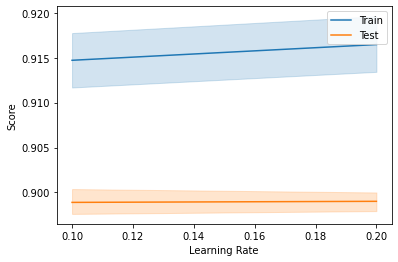

In [154]:
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

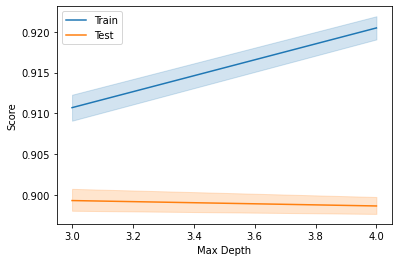

In [155]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

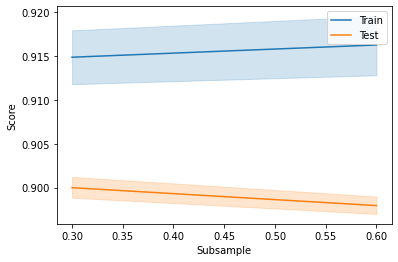

In [156]:
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [157]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15, 'subsample': 0.3}

In [158]:
XGBC=XGBClassifier(random_state=101,learning_rate=0.1,max_depth=3,n_estimators=15,subsample=0.3)
XGBC.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, ...)

In [159]:
y_pred=XGBC.predict(X_test)
y_pred2=XGBC.predict(X_train)

In [160]:
acc_XGBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9092729248898804
Test:  0.9044269045984901


In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      3808
         1.0       0.86      0.87      0.86      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.90      0.89      5828
weighted avg       0.90      0.90      0.90      5828



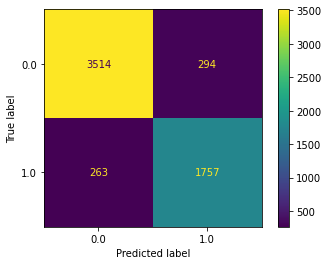

In [162]:
plot_confusion_matrix(XGBC,X_test,y_test);

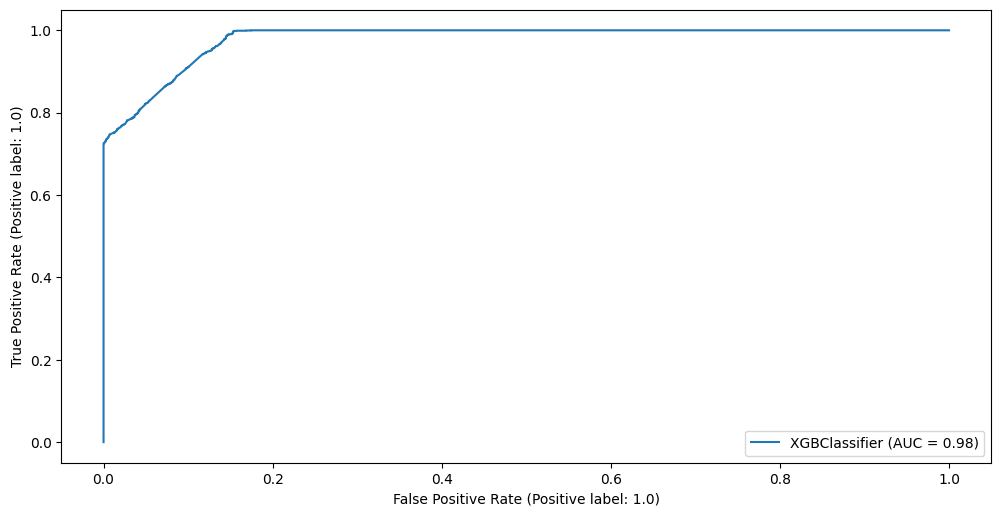

In [163]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(XGBC,X_test,y_test,ax=ax);

# LGBMClassifier

In [164]:
from lightgbm import LGBMClassifier

In [165]:
LGBMC= LGBMClassifier(random_state=101)
params={
    "n_estimators":[5,10,15,20],
    "learning_rate":[0.2,0.1,0.05],
    "max_depth":[3,4,8],
    "subsample":[0.3,0.6,0.9]
}

In [166]:
grid_model=GridSearchCV(LGBMC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.2,

GridSearchCV(estimator=LGBMClassifier(random_state=101),
             param_grid={'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [3, 4, 8],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, verbose=2)

In [167]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.745500,0.127584,0.011768,0.001163,0.2,3,5,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.911067,...,0.907499,0.002982,13,0.908324,0.908831,0.908187,0.910046,0.910118,0.909101,0.000829
1,1.581971,0.066461,0.018150,0.006289,0.2,3,5,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.911067,...,0.907499,0.002982,13,0.908324,0.908831,0.908187,0.910046,0.910118,0.909101,0.000829
2,1.718605,0.114979,0.012168,0.003051,0.2,3,5,0.9,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.911067,...,0.907499,0.002982,13,0.908324,0.908831,0.908187,0.910046,0.910118,0.909101,0.000829
3,1.849655,0.120738,0.012764,0.002477,0.2,3,10,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.909351,...,0.906413,0.002128,37,0.909396,0.911548,0.910619,0.912549,0.912192,0.911261,0.001140
4,1.665147,0.054755,0.011769,0.001596,0.2,3,10,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.909351,...,0.906413,0.002128,37,0.909396,0.911548,0.910619,0.912549,0.912192,0.911261,0.001140


Text(0, 0.5, 'Score')

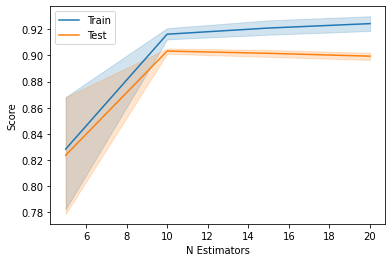

In [168]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

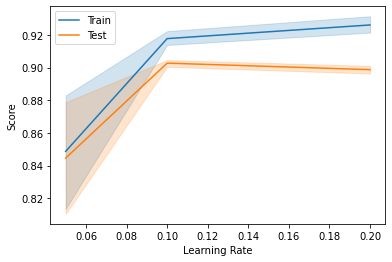

In [169]:
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

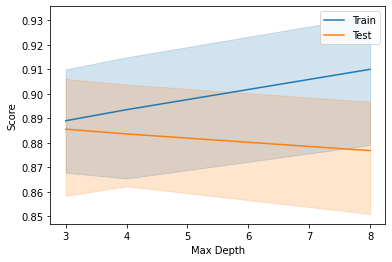

In [170]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

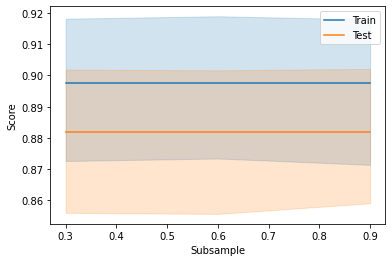

In [171]:
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [172]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.3}

In [173]:
LGBMC=LGBMClassifier(random_state=101,learning_rate=0.05,max_depth=8,n_estimators=10,subsample=0.3)
LGBMC.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.05, max_depth=8, n_estimators=10,
               random_state=101, subsample=0.3)

In [174]:
y_pred=LGBMC.predict(X_test)
y_pred2=LGBMC.predict(X_train)

In [175]:
acc_LGBMC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9079572106858875
Test:  0.9056280027453671


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      3808
         1.0       1.00      0.73      0.84      2020

    accuracy                           0.91      5828
   macro avg       0.94      0.86      0.89      5828
weighted avg       0.92      0.91      0.90      5828



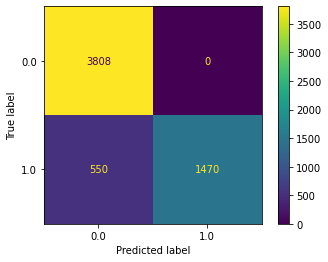

In [177]:
plot_confusion_matrix(LGBMC,X_test,y_test);

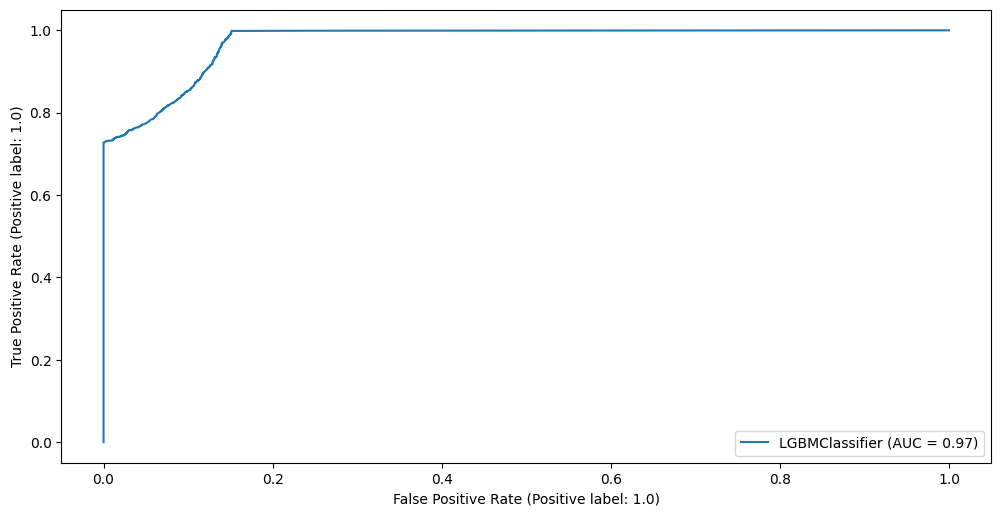

In [178]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(LGBMC,X_test,y_test,ax=ax);

# Cat Boost Classifier

In [180]:
from catboost import CatBoostClassifier

In [181]:
CBC=CatBoostClassifier(random_state=101)
params={
    "n_estimators":[5,10,15],
    "learning_rate":[0.2,0.1],
    "max_depth":[3,4],
    "subsample":[0.3,0.6]
}

In [182]:
grid_model=GridSearchCV(CBC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.4778057	total: 188ms	remaining: 754ms
1:	learn: 0.3659592	total: 222ms	remaining: 333ms
2:	learn: 0.2913585	total: 260ms	remaining: 173ms
3:	learn: 0.2395297	total: 294ms	remaining: 73.4ms
4:	learn: 0.2173428	total: 324ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   4.9s
0:	learn: 0.4391090	total: 55.5ms	remaining: 222ms
1:	learn: 0.3397729	total: 90.7ms	remaining: 136ms
2:	learn: 0.2749862	total: 123ms	remaining: 81.8ms
3:	learn: 0.2460446	total: 155ms	remaining: 38.7ms
4:	learn: 0.2105660	total: 186ms	remaining: 0us
[CV] END learning_rate=0.2, max_depth=3, n_estimators=5, subsample=0.3; total time=   5.0s
0:	learn: 0.4544228	total: 46.4ms	remaining: 185ms
1:	learn: 0.3225595	total: 79.7ms	remaining: 120ms
2:	learn: 0.2580482	total: 111ms	remaining: 74.3ms
3:	learn: 0.2314926	total: 144ms	remaining: 36ms
4:	learn: 0.2076056	total: 177ms	remaining: 0us
[CV] 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000002196B096520>,
             param_grid={'learning_rate': [0.2, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [5, 10, 15], 'subsample': [0.3, 0.6]},
             return_train_score=True, verbose=2)

In [183]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.254375,0.361651,0.854322,0.062652,0.2,3,5,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.907921,...,0.902866,0.003361,18,0.903676,0.906114,0.903540,0.905542,0.903683,0.904511,0.001092
1,3.915751,0.105551,0.784704,0.018448,0.2,3,5,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.907921,...,0.902008,0.003853,21,0.905463,0.908187,0.905256,0.907687,0.906686,0.906656,0.001165
2,4.032067,0.105490,0.785899,0.017181,0.2,3,10,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.910495,...,0.903952,0.003566,8,0.907037,0.907401,0.905327,0.906185,0.907186,0.906627,0.000770
3,4.209470,0.157067,0.761365,0.035280,0.2,3,10,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.910781,...,0.903152,0.004446,16,0.906608,0.907401,0.907472,0.907687,0.906614,0.907156,0.000455
4,4.285136,0.090805,0.779913,0.016090,0.2,3,15,0.3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.909351,...,0.902294,0.005019,20,0.908824,0.910046,0.907544,0.907687,0.909188,0.908658,0.000940


Text(0, 0.5, 'Score')

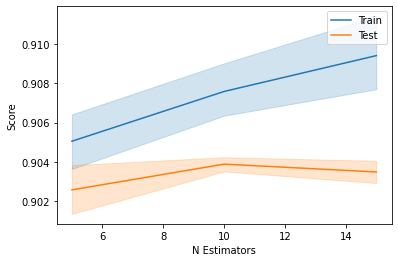

In [184]:
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_n_estimators",y="mean_test_score",label="Test")
plt.xlabel("N Estimators")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

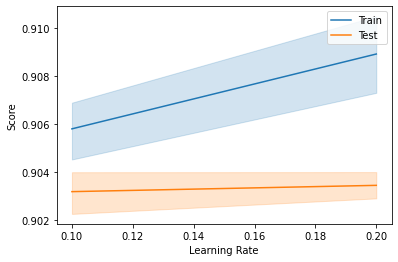

In [185]:
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_learning_rate",y="mean_test_score",label="Test")
plt.xlabel("Learning Rate")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

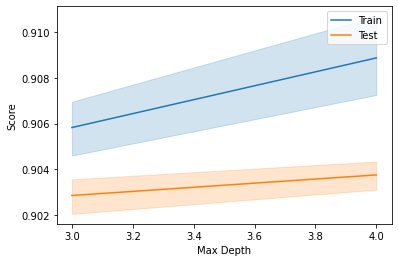

In [186]:
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_max_depth",y="mean_test_score",label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

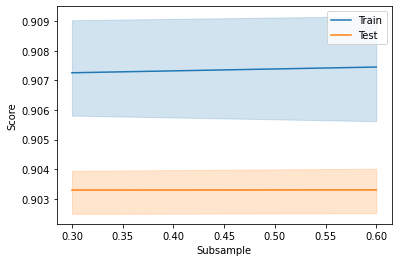

In [187]:
sns.lineplot(data=cv_results,x="param_subsample",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_subsample",y="mean_test_score",label="Test")
plt.xlabel("Subsample")
plt.ylabel("Score")

In [188]:
grid_model.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 5, 'subsample': 0.6}

In [189]:
CBC=CatBoostClassifier(random_state=101,learning_rate=0.2,max_depth=4,n_estimators=5,subsample=0.6)
CBC.fit(X_train,y_train)

0:	learn: 0.4313659	total: 95.4ms	remaining: 382ms
1:	learn: 0.2683115	total: 173ms	remaining: 260ms
2:	learn: 0.2249736	total: 242ms	remaining: 161ms
3:	learn: 0.1990390	total: 348ms	remaining: 86.9ms
4:	learn: 0.1831884	total: 437ms	remaining: 0us


In [190]:
y_pred=CBC.predict(X_test)
y_pred2=CBC.predict(X_train)

In [191]:
acc_CBC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9080716206166696
Test:  0.9035689773507206


In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      3808
         1.0       0.91      0.80      0.85      2020

    accuracy                           0.90      5828
   macro avg       0.91      0.88      0.89      5828
weighted avg       0.90      0.90      0.90      5828



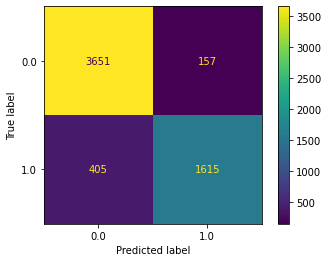

In [193]:
plot_confusion_matrix(CBC,X_test,y_test);

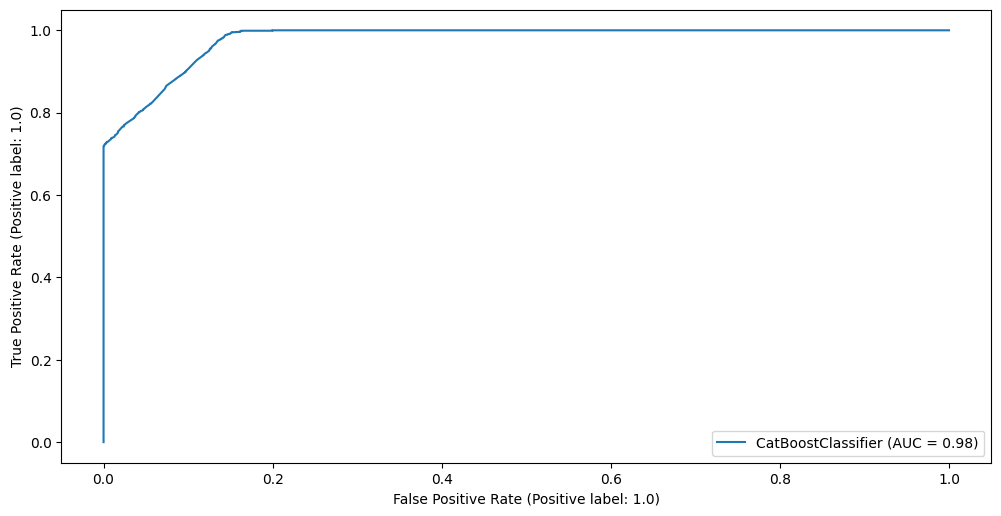

In [194]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(CBC,X_test,y_test,ax=ax);

# Bernoulli NB

In [195]:
from sklearn.naive_bayes import BernoulliNB

In [196]:
BNB=BernoulliNB()
BNB.fit(X_train,y_train)

BernoulliNB()

In [197]:
y_pred=BNB.predict(X_test)
y_pred2=BNB.predict(X_train)

In [198]:
acc_BNB=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.8708883931125222
Test:  0.8632463967055594


In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3808
         1.0       0.87      0.72      0.78      2020

    accuracy                           0.86      5828
   macro avg       0.86      0.83      0.84      5828
weighted avg       0.86      0.86      0.86      5828



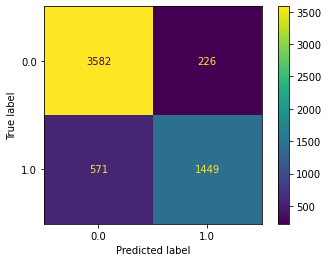

In [200]:
plot_confusion_matrix(BNB,X_test,y_test);

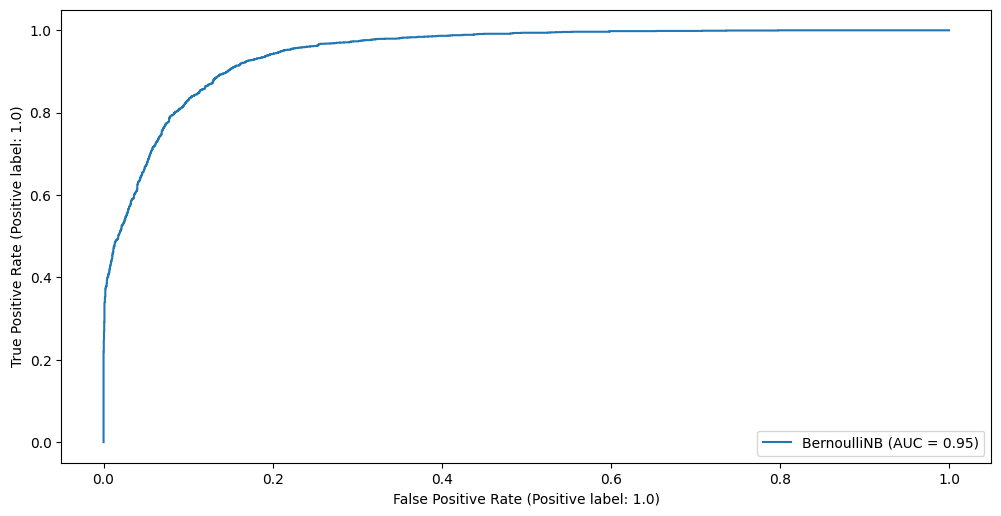

In [201]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(BNB,X_test,y_test,ax=ax);

# SGDClassifier

In [202]:
from sklearn.linear_model import SGDClassifier

In [203]:
SGDC=SGDClassifier(random_state=101)
params={"alpha":[0.0001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
        "l1_ratio": [0.1, 0.5,1]}

In [204]:
grid_model=GridSearchCV(SGDC,params,return_train_score=True,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   2.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.2s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.7s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.1; total time=   1.2s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   2.4s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.2s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.7s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.8s
[CV] END .........................alpha=0.0001, l1_ratio=0.5; total time=   1.4s
[CV] END ...........................alpha=0.0001, l1_ratio=1; total time=   2.5s
[CV] END ...........................alpha=0.000

GridSearchCV(estimator=SGDClassifier(random_state=101),
             param_grid={'alpha': [0.0001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0],
                         'l1_ratio': [0.1, 0.5, 1]},
             return_train_score=True, verbose=2)

In [205]:
cv_results=pd.DataFrame(grid_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.824472,0.597899,0.004183,0.000401,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",0.898484,0.896739,0.900458,...,0.898804,0.004075,34,0.909253,0.909760,0.912406,0.911405,0.917197,0.912004,0.002831
1,1.780844,0.428381,0.004775,0.001166,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",0.898484,0.896739,0.900458,...,0.898804,0.004075,34,0.909253,0.909760,0.912406,0.911405,0.917197,0.912004,0.002831
2,1.832911,0.480463,0.005176,0.001451,0.0001,1,"{'alpha': 0.0001, 'l1_ratio': 1}",0.898484,0.896739,0.900458,...,0.898804,0.004075,34,0.909253,0.909760,0.912406,0.911405,0.917197,0.912004,0.002831
3,0.961247,0.124060,0.004853,0.001558,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.894481,0.893021,0.906178,...,0.898233,0.004584,37,0.914331,0.919128,0.916267,0.914623,0.916267,0.916123,0.001705
4,0.926935,0.160010,0.004381,0.000482,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",0.894481,0.893021,0.906178,...,0.898233,0.004584,37,0.914331,0.919128,0.916267,0.914623,0.916267,0.916123,0.001705


Text(0, 0.5, 'Score')

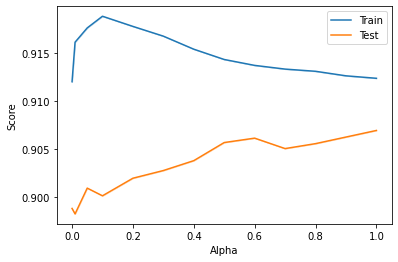

In [206]:
sns.lineplot(data=cv_results,x="param_alpha",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_alpha",y="mean_test_score",label="Test")
plt.xlabel("Alpha")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

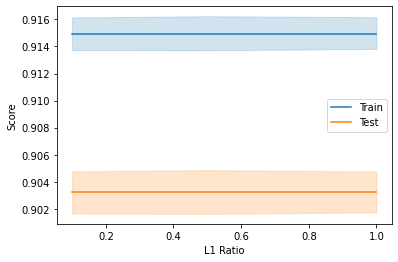

In [207]:
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_train_score",label="Train")
sns.lineplot(data=cv_results,x="param_l1_ratio",y="mean_test_score",label="Test")
plt.xlabel("L1 Ratio")
plt.ylabel("Score")

In [208]:
grid_model.best_params_

{'alpha': 1.0, 'l1_ratio': 0.1}

In [209]:
SGDC=SGDClassifier(random_state=101,alpha=1.0,l1_ratio=0.1)
SGDC.fit(X_train,y_train)

SGDClassifier(alpha=1.0, l1_ratio=0.1, random_state=101)

In [210]:
y_pred=SGDC.predict(X_test)
y_pred2=SGDC.predict(X_train)


In [211]:
acc_SGDC=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9121331731594302
Test:  0.9015099519560741


In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      3808
         1.0       0.83      0.91      0.86      2020

    accuracy                           0.90      5828
   macro avg       0.89      0.90      0.89      5828
weighted avg       0.91      0.90      0.90      5828



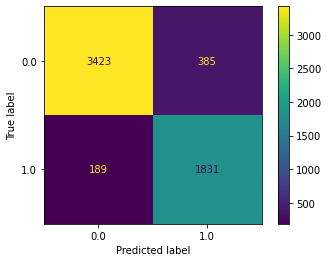

In [213]:
plot_confusion_matrix(SGDC,X_test,y_test);

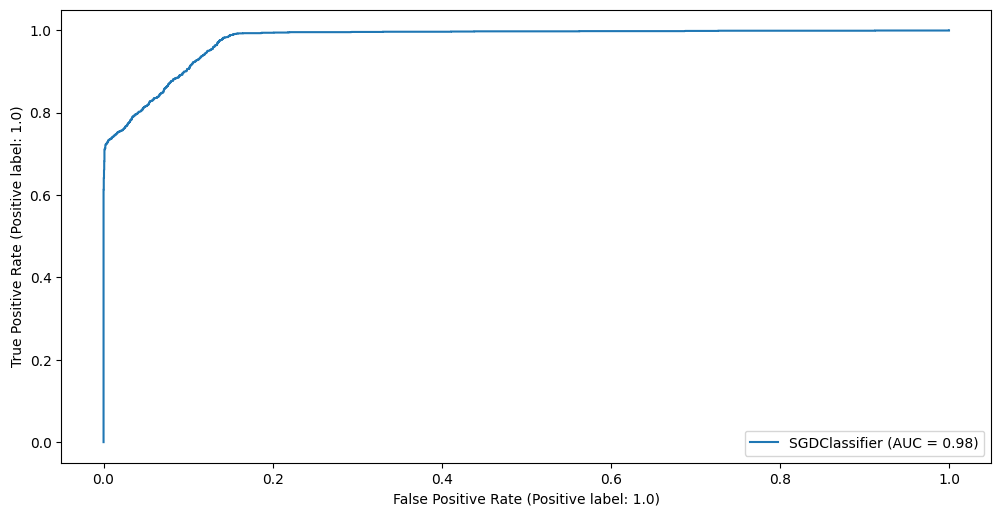

In [214]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(SGDC,X_test,y_test,ax=ax);

# Voting Classifier

In [215]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Gradient Boosting Classifier', GBC), ('Cat Boost Classifier', CBC), ('XGboost', XGBC),  ('Decision Tree', DTC),
               ('Extra Tree', ETC), ('Light Gradient', LGBMC), ('Random Forest', RFC), ('Ada Boost', ABC), ('Logistic', lr),
               ('Knn', KNC),("Support Vector Classifier",svc),("Ridge Classifier",RC),("Stochastic Gradient Descent Classifier",SGDC),("Bagging Classifier",BC)]

In [216]:
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

0:	learn: 0.4313659	total: 74.7ms	remaining: 299ms
1:	learn: 0.2683115	total: 140ms	remaining: 211ms
2:	learn: 0.2249736	total: 206ms	remaining: 138ms
3:	learn: 0.1990390	total: 263ms	remaining: 65.7ms
4:	learn: 0.1831884	total: 323ms	remaining: 0us


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(max_depth=4,
                                                         n_estimators=5,
                                                         random_state=101,
                                                         subsample=0.3)),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000002198428A1F0>),
                             ('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample...
                              SVC(C=0.01, degree=1, kernel='linear',
                                  random_state=101)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=0.0001, random_state=101)),
                             ('Stochastic Gradient Descent Classifier',
                              SGDClassifier(alpha=1.0, l1_ratio=0.1,
                                            random_state=101)),
                             ('Bagging Classifier',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                      random_state=101),
                                                max_features=20,
                                                max_samples=100,
                                                random_state=101))])

In [217]:
y_pred=vc.predict(X_test)
y_pred2=vc.predict(X_train)
acc_vc=accuracy_score(y_test,y_pred)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred))

Train:  0.9183113094216578
Test:  0.9015099519560741


In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      3808
         1.0       0.97      0.74      0.84      2020

    accuracy                           0.90      5828
   macro avg       0.92      0.86      0.88      5828
weighted avg       0.91      0.90      0.90      5828



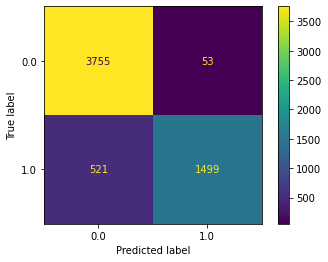

In [219]:
plot_confusion_matrix(vc,X_test,y_test);

# Comparative analysis among the algorithms for this project

In [220]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'Ridge Classifier',"Bagging Classifier","SGDC","Bernoulli NB","Support Vector Classifier"],
    'Score' : [acc_lr, acc_KNC, acc_DTC, acc_RFC, acc_ABC, acc_GBC, acc_XGBC, acc_CBC, acc_ETC, acc_LGBMC, acc_vc, acc_RC,acc_BC,acc_SGDC,acc_BNB,acc_SVC]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,LGBM,0.905628
5,Gradient Boosting Classifier,0.904770
6,XgBoost,0.904427
2,Decision Tree Classifier,0.904255
7,Cat Boost,0.903569
10,Voting Classifier,0.901510
13,SGDC,0.901510
3,Random Forest Classifier,0.898593
11,Ridge Classifier,0.897220
0,Logistic Regression,0.896019


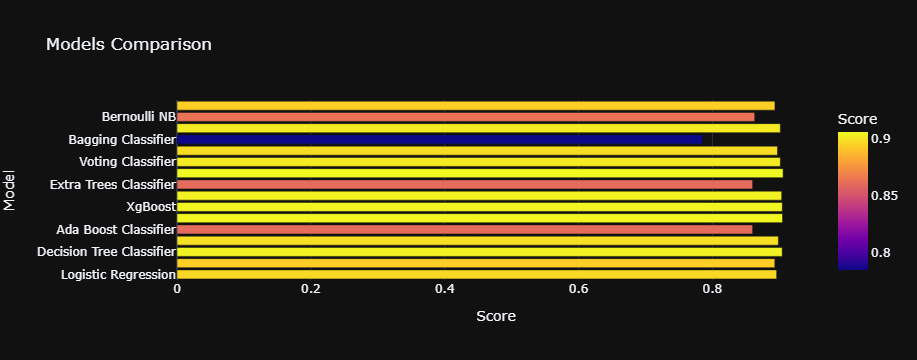

In [222]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

# Conclusion
- 16 different types ogf ML Models created.
- LGBM Model gave best score.
- Gradient Boosting Classifier Model gave the second best score.